In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("cleaned_vers_data_covid19_vaccine_2020-2022_duplicate_removed.csv")

/var/folders/ry/gdt__cb1489gsf8_j6qspxmr0000gn/T/ipykernel_12755/2369990850.py:1: DtypeWarning: Columns (31) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("cleaned_vers_data_covid19_vaccine_2020-2022_duplicate_removed.csv")


In [4]:
df.head()

,VAERS_ID,RECVDATE,STATE,AGE_YRS,CAGE_YR,SEX,SYMPTOM_TEXT,DIED,DATEDIED,L_THREAT,...,SYMPTOM4,SYMPTOMVERSION4,SYMPTOM5,SYMPTOMVERSION5,Symptoms,VAX_TYPE,VAX_MANU,VAX_DOSE_SERIES,VAX_ROUTE,VAX_NAME
0,902418,12/15/2020,NJ,56.0,56.0,F,Patient experienced mild numbness traveling fr...,N,Not applicable,N,...,No symptom,0.0,No symptom,0.0,"Hypoaesthesia, Injection site hypoaesthesia",COVID19,PFIZER\BIONTECH,1,IM,COVID19 (COVID19 (PFIZER-BIONTECH))
1,902440,12/15/2020,AZ,35.0,35.0,F,C/O Headache,N,Not applicable,N,...,No symptom,0.0,No symptom,0.0,Headache,COVID19,PFIZER\BIONTECH,1,SYR,COVID19 (COVID19 (PFIZER-BIONTECH))
2,902446,12/15/2020,WV,55.0,55.0,F,"felt warm, hot and face and ears were red and ...",N,Not applicable,N,...,No symptom,0.0,No symptom,0.0,"Erythema, Feeling hot, Flushing",COVID19,PFIZER\BIONTECH,1,IM,COVID19 (COVID19 (PFIZER-BIONTECH))
3,902464,12/15/2020,LA,42.0,42.0,M,within 15 minutes progressive light-headedness...,N,Not applicable,N,...,Laboratory test normal,23.1,Presyncope,23.1,"Dizziness, Electrocardiogram normal, Hyperhidr...",COVID19,PFIZER\BIONTECH,UNK,IM,COVID19 (COVID19 (PFIZER-BIONTECH))
4,902465,12/15/2020,AR,60.0,60.0,F,Pt felt wave come over body @ 1218 starting in...,N,Not applicable,N,...,"Paraesthesia oral, No symptom","23.1, 0.0","Parosmia, No symptom","23.1, 0.0","Dysgeusia, Sensory disturbance, Oral pruritus,...",COVID19,PFIZER\BIONTECH,1,IM,COVID19 (COVID19 (PFIZER-BIONTECH))


In [5]:
#Dropping unnecessary columns.
df.drop(["L_THREAT","ER_VISIT","X_STAY","DISABLE","ONSET_DATE","V_ADMINBY","TODAYS_DATE","OFC_VISIT","ER_ED_VISIT","SYMPTOMVERSION1","SYMPTOMVERSION2","SYMPTOMVERSION3","SYMPTOMVERSION4","SYMPTOMVERSION5"],axis=1,inplace=True)

In [6]:
#First observations.
df.head()

,VAERS_ID,RECVDATE,STATE,AGE_YRS,CAGE_YR,SEX,SYMPTOM_TEXT,DIED,DATEDIED,HOSPITAL,...,SYMPTOM2,SYMPTOM3,SYMPTOM4,SYMPTOM5,Symptoms,VAX_TYPE,VAX_MANU,VAX_DOSE_SERIES,VAX_ROUTE,VAX_NAME
0,902418,12/15/2020,NJ,56.0,56.0,F,Patient experienced mild numbness traveling fr...,N,Not applicable,N,...,Injection site hypoaesthesia,No symptom,No symptom,No symptom,"Hypoaesthesia, Injection site hypoaesthesia",COVID19,PFIZER\BIONTECH,1,IM,COVID19 (COVID19 (PFIZER-BIONTECH))
1,902440,12/15/2020,AZ,35.0,35.0,F,C/O Headache,N,Not applicable,N,...,No symptom,No symptom,No symptom,No symptom,Headache,COVID19,PFIZER\BIONTECH,1,SYR,COVID19 (COVID19 (PFIZER-BIONTECH))
2,902446,12/15/2020,WV,55.0,55.0,F,"felt warm, hot and face and ears were red and ...",N,Not applicable,N,...,Feeling hot,Flushing,No symptom,No symptom,"Erythema, Feeling hot, Flushing",COVID19,PFIZER\BIONTECH,1,IM,COVID19 (COVID19 (PFIZER-BIONTECH))
3,902464,12/15/2020,LA,42.0,42.0,M,within 15 minutes progressive light-headedness...,N,Not applicable,N,...,Electrocardiogram normal,Hyperhidrosis,Laboratory test normal,Presyncope,"Dizziness, Electrocardiogram normal, Hyperhidr...",COVID19,PFIZER\BIONTECH,UNK,IM,COVID19 (COVID19 (PFIZER-BIONTECH))
4,902465,12/15/2020,AR,60.0,60.0,F,Pt felt wave come over body @ 1218 starting in...,N,Not applicable,N,...,"Oral pruritus, Tremor","Paraesthesia, No symptom","Paraesthesia oral, No symptom","Parosmia, No symptom","Dysgeusia, Sensory disturbance, Oral pruritus,...",COVID19,PFIZER\BIONTECH,1,IM,COVID19 (COVID19 (PFIZER-BIONTECH))


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 556858 entries, 0 to 556857
Data columns (total 32 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   VAERS_ID         556858 non-null  int64  
 1   RECVDATE         556858 non-null  object 
 2   STATE            556858 non-null  object 
 3   AGE_YRS          556858 non-null  float64
 4   CAGE_YR          556858 non-null  float64
 5   SEX              556858 non-null  object 
 6   SYMPTOM_TEXT     556858 non-null  object 
 7   DIED             556858 non-null  object 
 8   DATEDIED         556858 non-null  object 
 9   HOSPITAL         556858 non-null  object 
 10  HOSPDAYS         556858 non-null  float64
 11  RECOVD           556858 non-null  object 
 12  VAX_DATE         556858 non-null  object 
 13  NUMDAYS          556858 non-null  float64
 14  OTHER_MEDS       556858 non-null  object 
 15  CUR_ILL          556858 non-null  object 
 16  HISTORY          556858 non-null  obje

In [8]:
#The name of columns are not practical so in order to make it more practical, we are going to convert them to lowercase.
df.columns = df.columns.str.lower()

In [9]:
#Checking the column names.
df.columns

Index(['vaers_id', 'recvdate', 'state', 'age_yrs', 'cage_yr', 'sex',
       'symptom_text', 'died', 'datedied', 'hospital', 'hospdays', 'recovd',
       'vax_date', 'numdays', 'other_meds', 'cur_ill', 'history', 'prior_vax',
       'form_vers', 'birth_defect', 'allergies', 'symptom1', 'symptom2',
       'symptom3', 'symptom4', 'symptom5', 'symptoms', 'vax_type', 'vax_manu',
       'vax_dose_series', 'vax_route', 'vax_name'],
      dtype='object')

In [10]:
#First observations of statistical variables.
df.describe()

,vaers_id,age_yrs,cage_yr,hospdays,numdays,form_vers
count,5.568580e+05,556858.000000,556858.000000,556858.000000,556858.000000,556858.0
mean,1.526980e+06,49.047060,48.971298,0.709319,27.348629,2.0
std,4.595355e+05,19.551216,19.624038,189.528943,378.979029,0.0
min,9.024180e+05,0.080000,0.000000,0.000000,0.000000,2.0
25%,1.137990e+06,34.000000,34.000000,0.000000,0.000000,2.0
50%,1.412642e+06,50.000000,50.000000,0.000000,1.000000,2.0
75%,1.874428e+06,64.000000,64.000000,0.000000,7.000000,2.0
max,2.669048e+06,119.000000,120.000000,99999.000000,34252.000000,2.0


In [11]:
#The minimum values related to age in the output are noteworthy. It says some ages might be zero but it must be checked if they are real or not.
df["age_yrs"].value_counts().sort_index(ascending=True)

age_yrs
0.08      18
0.17      11
0.25       4
0.33      13
0.42      12
          ..
107.00     1
109.00     1
113.00     1
115.00     2
119.00     2
Name: count, Length: 150, dtype: int64

In [12]:
#The results indicate the there are some float values in the age columns, which are unreasonable. So we are going to convert data types of these values to integer.
df[["age_yrs","hospdays","numdays"]]=df[["age_yrs","hospdays","numdays"]].astype(int)

In [13]:
df["age_yrs"].value_counts().sort_index(ascending=True)

age_yrs
0      284
1      369
2      399
3      452
4      589
      ... 
107      1
109      1
113      1
115      2
119      2
Name: count, Length: 112, dtype: int64

In [14]:
df.drop("cage_yr",axis=1,inplace=True)

In [15]:
df["vaers_id"]=df["vaers_id"].astype("category")

In [16]:
#Converting data type of values related to date to data type DateTime
df["recvdate"]=pd.to_datetime(df["recvdate"],format='%m/%d/%Y')
df["vax_date"]=pd.to_datetime(df["vax_date"],format='%m/%d/%Y')

In [17]:
#Re-check the info of df.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 556858 entries, 0 to 556857
Data columns (total 31 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   vaers_id         556858 non-null  category      
 1   recvdate         556858 non-null  datetime64[ns]
 2   state            556858 non-null  object        
 3   age_yrs          556858 non-null  int64         
 4   sex              556858 non-null  object        
 5   symptom_text     556858 non-null  object        
 6   died             556858 non-null  object        
 7   datedied         556858 non-null  object        
 8   hospital         556858 non-null  object        
 9   hospdays         556858 non-null  int64         
 10  recovd           556858 non-null  object        
 11  vax_date         556858 non-null  datetime64[ns]
 12  numdays          556858 non-null  int64         
 13  other_meds       556858 non-null  object        
 14  cur_ill          556

In [18]:
df[["hospdays","numdays"]]=df[["hospdays","numdays"]].astype(int)

In [19]:
df.describe()

,recvdate,age_yrs,hospdays,vax_date,numdays,form_vers
count,556858,556858.000000,556858.000000,556858,556858.000000,556858.0
mean,2021-08-05 23:56:12.540934656,49.046473,0.709319,2021-05-27 22:27:32.233065472,27.348629,2.0
min,2020-12-15 00:00:00,0.000000,0.000000,1927-04-22 00:00:00,0.000000,2.0
25%,2021-03-26 00:00:00,34.000000,0.000000,2021-02-19 00:00:00,0.000000,2.0
50%,2021-06-18 00:00:00,50.000000,0.000000,2021-04-07 00:00:00,1.000000,2.0
75%,2021-11-15 00:00:00,64.000000,0.000000,2021-08-25 00:00:00,7.000000,2.0
max,2022-12-31 00:00:00,119.000000,99999.000000,2022-12-30 00:00:00,34252.000000,2.0
std,NaN,19.552661,189.528943,NaN,378.979029,0.0


In [20]:
#So the function describe() results are better to examine. Now, the next step will be observing the null values in the dataframe.
df.isnull().sum()

vaers_id           0
recvdate           0
state              0
age_yrs            0
sex                0
symptom_text       0
died               0
datedied           0
hospital           0
hospdays           0
recovd             0
vax_date           0
numdays            0
other_meds         0
cur_ill            0
history            0
prior_vax          0
form_vers          0
birth_defect       0
allergies          0
symptom1           0
symptom2           0
symptom3           0
symptom4           0
symptom5           0
symptoms           0
vax_type           0
vax_manu           0
vax_dose_series    0
vax_route          0
vax_name           0
dtype: int64

In [21]:
df['datedied'] = df['datedied'].apply(lambda x: np.nan if x == "Not applicable" else x)
df["datedied"]=pd.to_datetime(df["datedied"],format='%m/%d/%Y')

In [22]:
#The result are quite useful because there is no missing values to fill with median or to drop.
#Now that the dataset is cleaned, we can start data analysis.
#The first step will observe the ratio of case by gender.
df["sex"].value_counts()

sex
F    382075
M    171393
U      3390
Name: count, dtype: int64

In [23]:
df["sex"].value_counts(normalize=True).round(2)

sex
F    0.69
M    0.31
U    0.01
Name: proportion, dtype: float64

In [24]:
filt_sex_df=df[(df["sex"]=="M") | (df["sex"]=="F")]

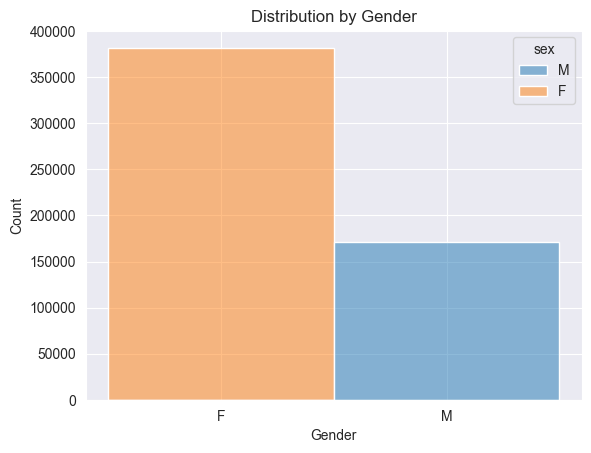

In [25]:
sns.histplot(data=filt_sex_df,x="sex",color="r",hue="sex",hue_order=["M","F"])
plt.title('Distribution by Gender')
plt.xlabel('Gender')
plt.show()

In [26]:
#Another observation will be the ratio of deaths and ratio of deaths by sex
filt_sex_df[["sex","died"]].value_counts(normalize=True).sort_index(ascending=True).round(2)

sex  died
F    N       0.68
     Y       0.01
M    N       0.30
     Y       0.01
Name: proportion, dtype: float64

In [27]:
#Since the death rates are very low, let's divide the cases into age groups for a more accurate analysis.
filt_sex_df["age_group"] = filt_sex_df["age_yrs"].apply(
    lambda x: "0-10" if x < 10 else
              "10-20" if 10 <= x < 20 else
              "20-30" if 20 <= x < 30 else
              "30-40" if 30 <= x < 40 else
              "40-50" if 40 <= x < 50 else
              "50-60" if 50 <= x < 60 else
              "60-70" if 60 <= x < 70 else
              "70-80" if 70 <= x < 80 else
              "+80"
)

/var/folders/ry/gdt__cb1489gsf8_j6qspxmr0000gn/T/ipykernel_12755/2137733818.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filt_sex_df["age_group"] = filt_sex_df["age_yrs"].apply(


In [28]:
ratio_deaths = filt_sex_df.groupby('age_group').agg(
    total_cases=('died', 'size'),
    total_deaths=('died', lambda x: (x == 'Y').sum())
)

In [29]:
ratio_deaths["ratio_deaths"]=(ratio_deaths["total_deaths"]/ratio_deaths["total_cases"]).round(3)

In [30]:
ratio_deaths.sort_values("ratio_deaths", inplace=True)

In [31]:
ratio_deaths

,total_cases,total_deaths,ratio_deaths
age_group,,,
0-10,8341,11,0.001
10-20,33987,56,0.002
20-30,56189,111,0.002
30-40,87675,189,0.002
40-50,88338,361,0.004
50-60,94010,808,0.009
60-70,94972,1826,0.019
70-80,62904,2361,0.038
+80,27052,3268,0.121


In [32]:
ratio_deaths.reset_index(inplace=True)

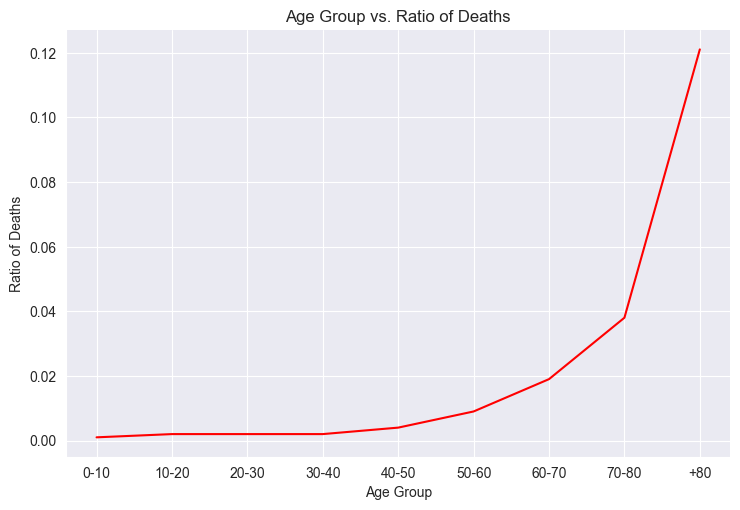

In [33]:
sns.relplot(data=ratio_deaths,x="age_group",y="ratio_deaths",kind="line",color="r",height=5,aspect=1.5);
plt.title('Age Group vs. Ratio of Deaths');
plt.xlabel('Age Group');
plt.ylabel('Ratio of Deaths');

In [34]:
ratio_deaths_sex = filt_sex_df.groupby(['age_group',"sex"]).agg(
    total_cases=('died', 'size'),
    total_deaths=('died', lambda x: (x == 'Y').sum())
)
ratio_deaths_sex["ratio_deaths"]=(ratio_deaths_sex["total_deaths"]/ratio_deaths_sex["total_cases"]).round(3)
ratio_deaths_sex.sort_values("ratio_deaths", inplace=True)

In [35]:
ratio_deaths_sex.sort_values("ratio_deaths",ascending=False)

total_cases  total_deaths  ratio_deaths
age_group sex                                         
+80       M          10236          1659         0.162
          F          16816          1609         0.096
70-80     M          22248          1356         0.061
60-70     M          29455          1093         0.037
70-80     F          40656          1005         0.025
50-60     M          26270           456         0.017
60-70     F          65517           733         0.011
40-50     M          22442           230         0.010
50-60     F          67740           352         0.005
30-40     M          23244           119         0.005
20-30     M          17777            72         0.004
40-50     F          65896           131         0.002
10-20     M          15523            25         0.002
          F          18464            31         0.002
0-10      F           4143             6         0.001
20-30     F          38412            39         0.001
0-10      M           4198             5         0.001
30-40     F          64431            70         0.001

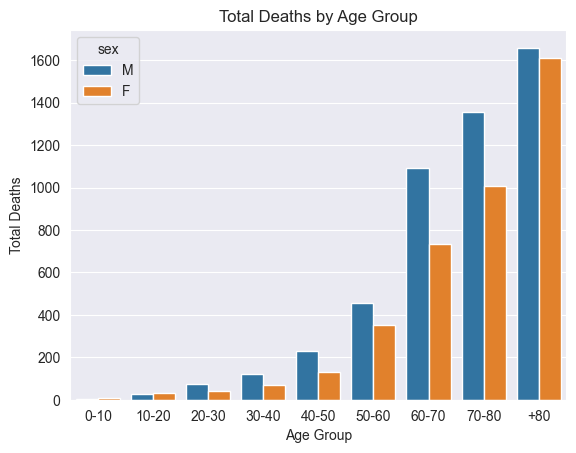

In [36]:
sns.barplot(data=ratio_deaths_sex,x="age_group",y="total_deaths",hue="sex",
            order=["0-10","10-20","20-30","30-40","40-50","50-60","60-70","70-80","+80"],
            hue_order=["M","F"]);
plt.title('Total Deaths by Age Group');
plt.xlabel('Age Group');
plt.ylabel('Total Deaths');

In [37]:
ratio_deaths_sex.reset_index(inplace=True)
ratio_deaths_sex["age_group"] = pd.Categorical(
    ratio_deaths_sex["age_group"],
    categories=["0-10", "10-20", "20-30", "30-40", "40-50", "50-60", "60-70", "70-80", "+80"],
    ordered=True
)

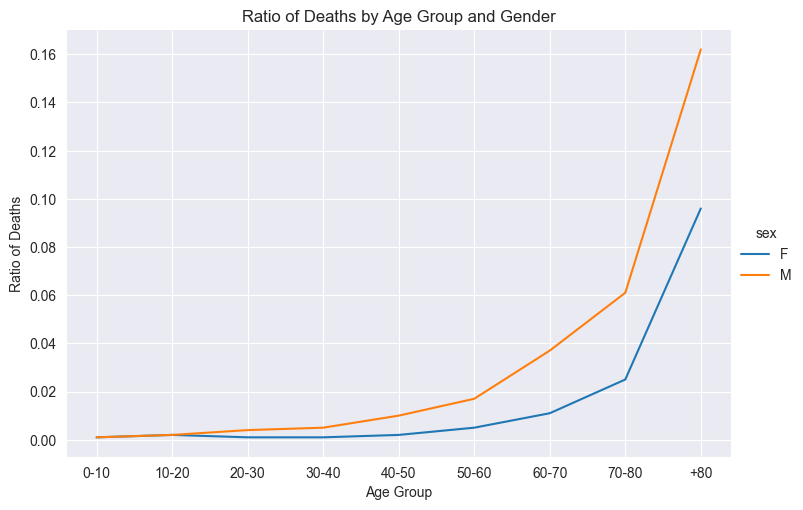

In [38]:
sns.relplot(data=ratio_deaths_sex.sort_values(by="age_group"),x="age_group", y="ratio_deaths",kind="line",color="r",height=5,aspect=1.5,hue="sex");
plt.title('Ratio of Deaths by Age Group and Gender');
plt.xlabel('Age Group');
plt.ylabel('Ratio of Deaths');

In [39]:
ratio_deaths_sex.sort_values("age_group",ascending=False)

,age_group,sex,total_cases,total_deaths,ratio_deaths
17,+80,M,10236,1659,0.162
16,+80,F,16816,1609,0.096
15,70-80,M,22248,1356,0.061
13,70-80,F,40656,1005,0.025
11,60-70,F,65517,733,0.011
14,60-70,M,29455,1093,0.037
12,50-60,M,26270,456,0.017
9,50-60,F,67740,352,0.005
10,40-50,M,22442,230,0.010
6,40-50,F,65896,131,0.002


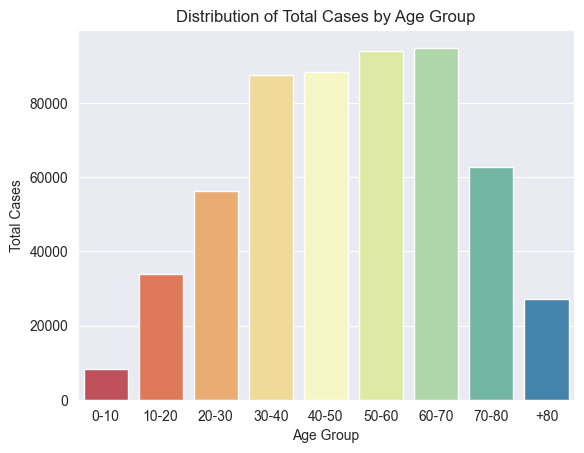

In [40]:
sns.barplot(data=ratio_deaths, x="age_group", y="total_cases",hue="age_group", palette="Spectral")
plt.title('Distribution of Total Cases by Age Group');
plt.xlabel('Age Group');
plt.ylabel('Total Cases');

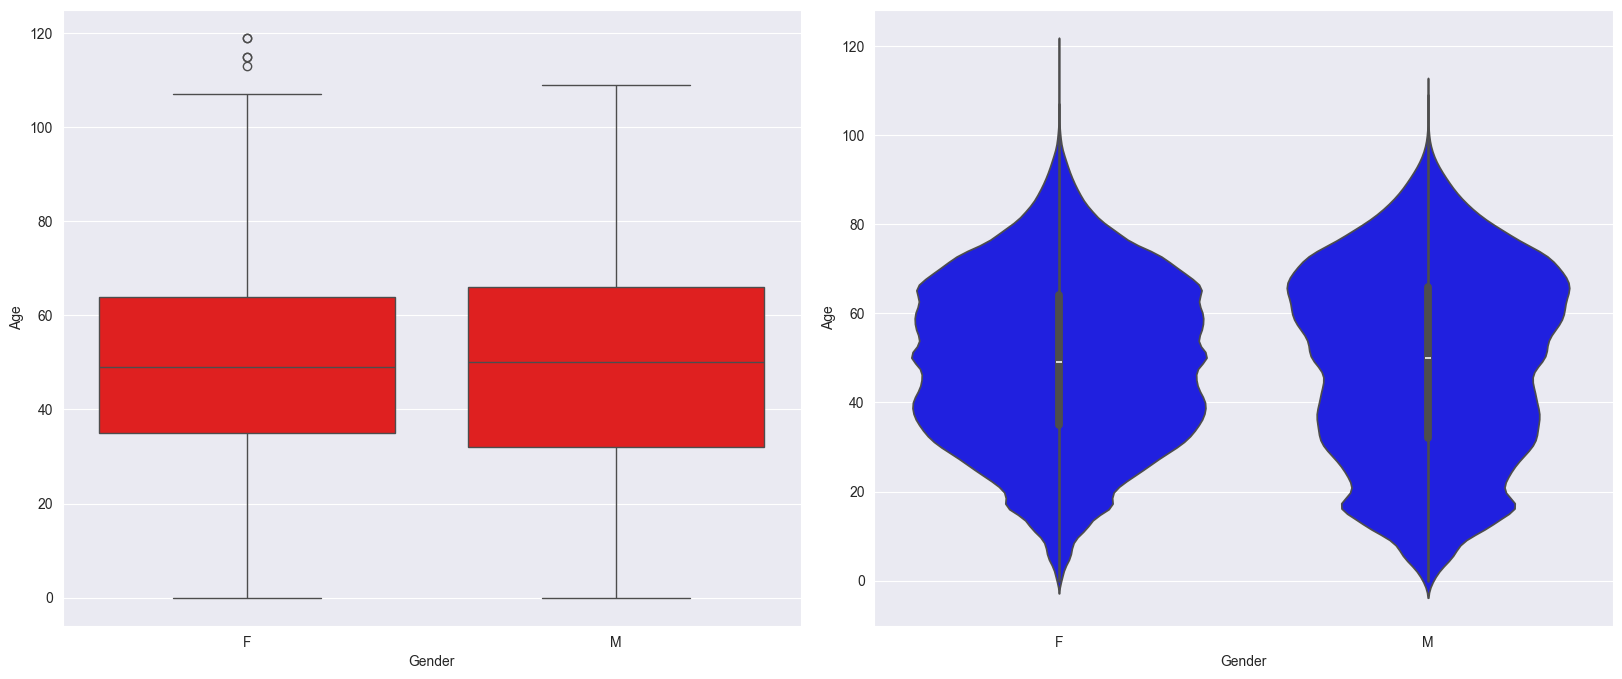

In [41]:
plt.subplots(1,2,figsize=(20,8));
plt.subplot(1,2,1)
sns.boxplot(data=filt_sex_df,x="sex",y="age_yrs",color="r");
plt.xlabel("Gender")
plt.ylabel('Age')
plt.subplot(1,2,2)
sns.violinplot(data=filt_sex_df,x="sex",y="age_yrs",color="b");
plt.xlabel("Gender")
plt.ylabel('Age')
plt.subplots_adjust(wspace=0.1)
plt.show()

In [42]:
filt_sex_df.head()

,vaers_id,recvdate,state,age_yrs,sex,symptom_text,died,datedied,hospital,hospdays,...,symptom3,symptom4,symptom5,symptoms,vax_type,vax_manu,vax_dose_series,vax_route,vax_name,age_group
0,902418,2020-12-15,NJ,56,F,Patient experienced mild numbness traveling fr...,N,NaT,N,0,...,No symptom,No symptom,No symptom,"Hypoaesthesia, Injection site hypoaesthesia",COVID19,PFIZER\BIONTECH,1,IM,COVID19 (COVID19 (PFIZER-BIONTECH)),50-60
1,902440,2020-12-15,AZ,35,F,C/O Headache,N,NaT,N,0,...,No symptom,No symptom,No symptom,Headache,COVID19,PFIZER\BIONTECH,1,SYR,COVID19 (COVID19 (PFIZER-BIONTECH)),30-40
2,902446,2020-12-15,WV,55,F,"felt warm, hot and face and ears were red and ...",N,NaT,N,0,...,Flushing,No symptom,No symptom,"Erythema, Feeling hot, Flushing",COVID19,PFIZER\BIONTECH,1,IM,COVID19 (COVID19 (PFIZER-BIONTECH)),50-60
3,902464,2020-12-15,LA,42,M,within 15 minutes progressive light-headedness...,N,NaT,N,0,...,Hyperhidrosis,Laboratory test normal,Presyncope,"Dizziness, Electrocardiogram normal, Hyperhidr...",COVID19,PFIZER\BIONTECH,UNK,IM,COVID19 (COVID19 (PFIZER-BIONTECH)),40-50
4,902465,2020-12-15,AR,60,F,Pt felt wave come over body @ 1218 starting in...,N,NaT,N,0,...,"Paraesthesia, No symptom","Paraesthesia oral, No symptom","Parosmia, No symptom","Dysgeusia, Sensory disturbance, Oral pruritus,...",COVID19,PFIZER\BIONTECH,1,IM,COVID19 (COVID19 (PFIZER-BIONTECH)),60-70


In [43]:
state_df=filt_sex_df.groupby("state").agg(total_cases=('vaers_id', 'size'),
                                 total_deaths=('died',
                                               lambda x:
                                               (x == 'Y').sum()))
state_df["death_ratio"]=(state_df["total_deaths"]/state_df["total_cases"]).round(3)
state_df.reset_index(inplace=True)
state_df.sort_values(["death_ratio"], ascending=False).head(20)


,state,total_cases,total_deaths,death_ratio
49,SD,1556,268,0.172
60,XB,6,1,0.167
20,KY,7935,813,0.102
50,TN,9411,708,0.075
31,MT,2787,109,0.039
57,WI,11253,397,0.035
44,PR,3407,116,0.034
13,GU,143,4,0.028
3,AS,38,1,0.026
33,ND,1276,33,0.026


In [44]:
max_cases_state = state_df.loc[state_df['total_cases'].idxmax()]
max_deaths_state = state_df.loc[state_df['total_deaths'].idxmax()]
max_death_rate_state = state_df.loc[state_df['death_ratio'].idxmax()]

most_df = pd.DataFrame({
    'Metric': ['Most Cases', 'Most Deaths', 'Highest Death Rate'],
    'State': [max_cases_state['state'], max_deaths_state['state'], max_death_rate_state['state']],
    'Total Cases': [max_cases_state['total_cases'], max_deaths_state['total_cases'], max_death_rate_state['total_cases']],
    'Total Deaths': [max_cases_state['total_deaths'], max_deaths_state['total_deaths'], max_death_rate_state['total_deaths']],
    'Death Ratio': [max_cases_state['death_ratio'], max_deaths_state['death_ratio'], max_death_rate_state['death_ratio']]
})

In [45]:
most_df

,Metric,State,Total Cases,Total Deaths,Death Ratio
0,Most Cases,CA,59945,498,0.008
1,Most Deaths,KY,7935,813,0.102
2,Highest Death Rate,SD,1556,268,0.172


In [46]:
vax_df=df.groupby("vax_manu").agg(total_cases=("vaers_id" ,"size"),total_deaths=('died',
                                               lambda x:
                                               (x == 'Y').sum()))
vax_df

,total_cases,total_deaths
vax_manu,,
JANSSEN,41034,792
MODERNA,282089,4109
NOVAVAX,129,0
PFIZER\BIONTECH,232669,4082
UNKNOWN MANUFACTURER,937,38


In [47]:
vax_df["death_ratio"]=(vax_df["total_deaths"]/vax_df["total_cases"]).round(3)
vax_df.drop(["UNKNOWN MANUFACTURER","NOVAVAX"]).sort_values(["death_ratio"], ascending=False)

,total_cases,total_deaths,death_ratio
vax_manu,,,
JANSSEN,41034,792,0.019
PFIZER\BIONTECH,232669,4082,0.018
MODERNA,282089,4109,0.015


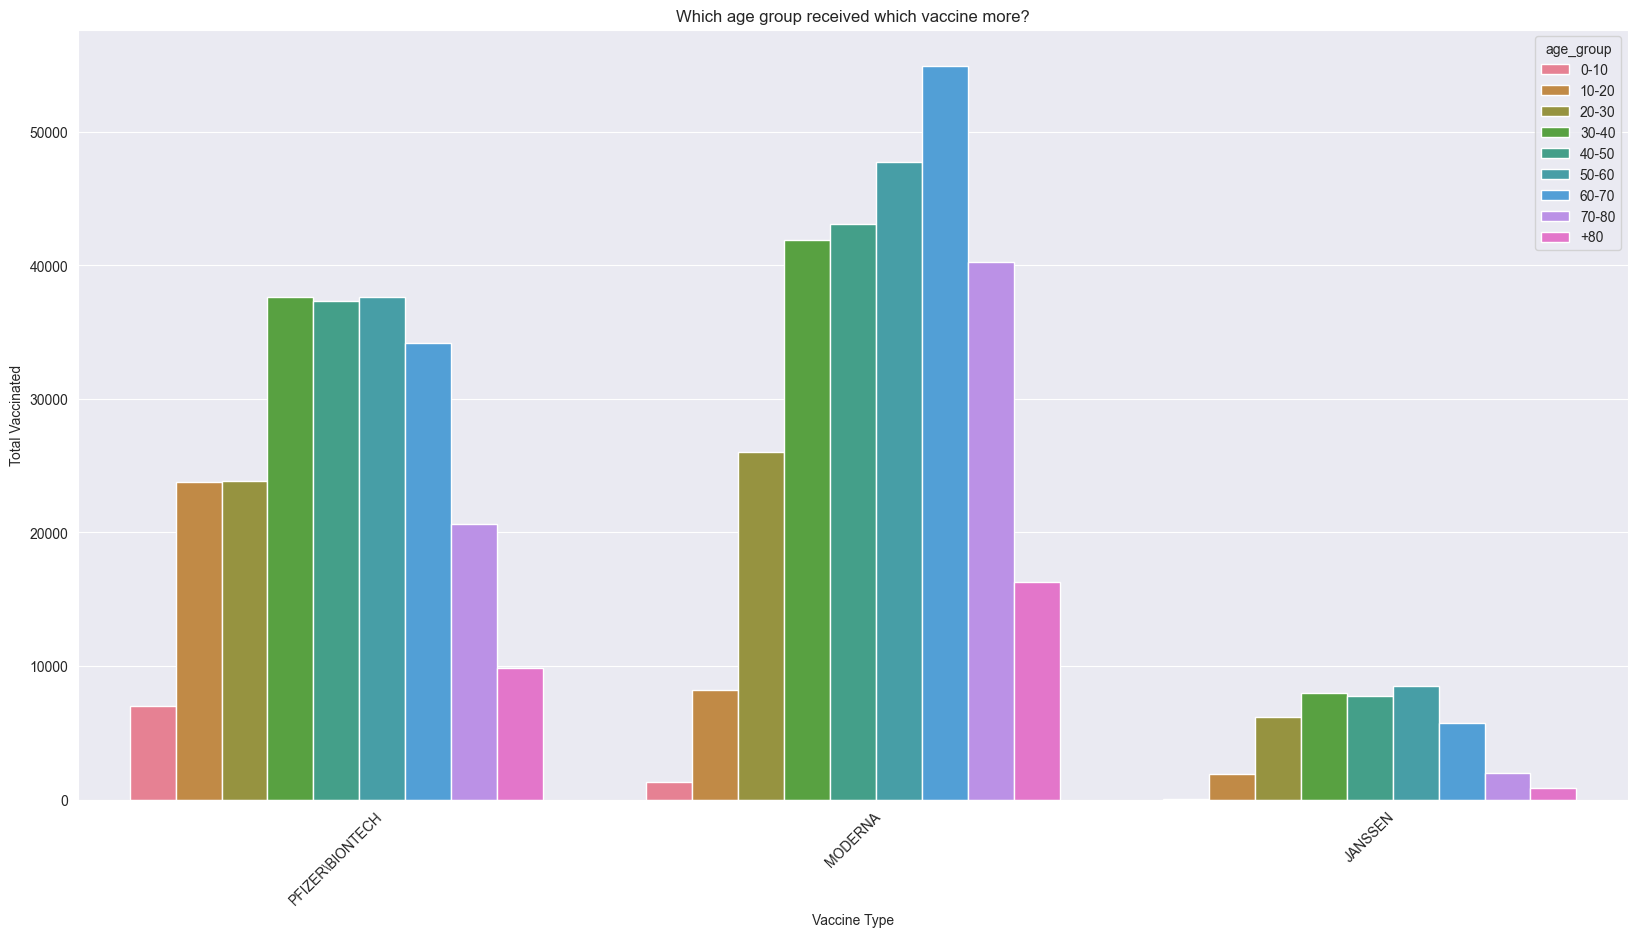

In [48]:
#Which age group received which vaccine more?
filt_sex_df = filt_sex_df[~filt_sex_df["vax_manu"].isin(["UNKNOWN MANUFACTURER", "NOVAVAX"])]
plt.figure(figsize=(20, 10))
sns.countplot(data=filt_sex_df,
x="vax_manu",hue="age_group",palette="husl",width=0.8,
              hue_order=["0-10", "10-20", "20-30", "30-40", "40-50", "50-60", "60-70", "70-80", "+80"]);
plt.xticks(rotation=45);
plt.title("Which age group received which vaccine more?");
plt.xlabel('Vaccine Type');
plt.ylabel('Total Vaccinated');

In [69]:
#Now, we will examine which common diseases patients have had before
diseases = df['history'].str.split(', ').explode().tolist()

In [50]:
diseases=list(set(diseases))

In [51]:
for x in ["No concerns","none","unknown","NONE","No","no","Unknown","0","na"]:
    diseases.remove(x)
diseases=[item.lower() for item in diseases]
diseases_count=pd.Series(diseases).value_counts()

In [68]:
diseases_count.sort_values(ascending=False).head()

high blood pressure                                       14
high blood pressure high cholesterol                      11
comments: no medical history information was reported.    10
factor v leiden                                            9
high blood pressure; high cholesterol                      9
Name: count, dtype: int64

In [53]:
#We will get new dataframe including the cases had hypertension before.
hp_df=df[(df["history"].str.contains("high blood pressure")) |
   (df["history"].str.contains("hypertension")) |
   (df["history"].str.contains("high bp")) |
   (df["history"].str.contains("blood pressure"))]
hp_df.head()

,vaers_id,recvdate,state,age_yrs,sex,symptom_text,died,datedied,hospital,hospdays,...,symptom2,symptom3,symptom4,symptom5,symptoms,vax_type,vax_manu,vax_dose_series,vax_route,vax_name
4,902465,2020-12-15,AR,60,F,Pt felt wave come over body @ 1218 starting in...,N,NaT,N,0,...,"Oral pruritus, Tremor","Paraesthesia, No symptom","Paraesthesia oral, No symptom","Parosmia, No symptom","Dysgeusia, Sensory disturbance, Oral pruritus,...",COVID19,PFIZER\BIONTECH,1,IM,COVID19 (COVID19 (PFIZER-BIONTECH))
14,902557,2020-12-15,AK,32,F,1750- IM injection ot R Deltoid. She was sitt...,N,NaT,N,0,...,"Blood test, Pulse abnormal","Dyspnoea, Tunnel vision","Erythema, No symptom","Flushing, No symptom","Blood glucose normal, Hyperhidrosis, Blood tes...",COVID19,PFIZER\BIONTECH,1,IM,COVID19 (COVID19 (PFIZER-BIONTECH))
24,902665,2020-12-16,MI,42,F,"Pt. became lightheaded, and clammy. noted hea...",N,NaT,N,0,...,"Cold sweat, No symptom","Condition aggravated, No symptom","Dizziness, No symptom","Panic attack, No symptom","Chest discomfort, Paraesthesia, Cold sweat, Co...",COVID19,PFIZER\BIONTECH,1,IM,COVID19 (COVID19 (PFIZER-BIONTECH))
48,902764,2020-12-16,NC,71,F,".5 inch bruise at injection site, slight swell...",N,NaT,N,0,...,Injection site pain,Injection site swelling,No symptom,No symptom,"Injection site bruising, Injection site pain, ...",COVID19,PFIZER\BIONTECH,UNK,UN,COVID19 (COVID19 (PFIZER-BIONTECH))
54,902780,2020-12-16,CA,34,F,The patient got a rash on the upper chest and ...,N,NaT,N,0,...,No symptom,No symptom,No symptom,No symptom,Rash,COVID19,PFIZER\BIONTECH,1,IM,COVID19 (COVID19 (PFIZER-BIONTECH))


In [54]:
#Asthma dataframe
asthma_df=df[(df["history"].str.contains("asthma"))]
asthma_df.head()

,vaers_id,recvdate,state,age_yrs,sex,symptom_text,died,datedied,hospital,hospdays,...,symptom2,symptom3,symptom4,symptom5,symptoms,vax_type,vax_manu,vax_dose_series,vax_route,vax_name
28,902672,2020-12-16,MA,33,F,"Left arm swelling of forearm, old L wrist tatt...",N,NaT,N,0,...,Joint swelling,Peripheral swelling,Pruritus,No symptom,"Erythema, Joint swelling, Peripheral swelling,...",COVID19,PFIZER\BIONTECH,1,IM,COVID19 (COVID19 (PFIZER-BIONTECH))
88,902908,2020-12-17,OK,44,M,"Extreme fatigue, felt very warm all over body ...",N,NaT,N,0,...,Fatigue,Feeling hot,Pruritus,No symptom,"Arthralgia, Fatigue, Feeling hot, Pruritus",COVID19,PFIZER\BIONTECH,1,IM,COVID19 (COVID19 (PFIZER-BIONTECH))
154,903120,2020-12-17,MI,34,M,12/16/2020 episode of abdominal cramps I had a...,N,NaT,N,0,...,"Asthenia, Hyperhidrosis","Cold sweat, No symptom","Diarrhoea, No symptom","Dizziness, No symptom","Abdominal pain, Head discomfort, Asthenia, Hyp...",COVID19,PFIZER\BIONTECH,1,SYR,COVID19 (COVID19 (PFIZER-BIONTECH))
191,903178,2020-12-17,FL,29,F,"Two minutes after vaccination, she reported it...",N,NaT,N,0,...,"Dizziness, No symptom","Erythema, No symptom","Injection site pruritus, No symptom","Pruritus, No symptom","Chest discomfort, Urticaria, Dizziness, Erythe...",COVID19,PFIZER\BIONTECH,1,IM,COVID19 (COVID19 (PFIZER-BIONTECH))
200,903193,2020-12-17,MI,56,F,Caller stated that headaches occurred at 12 in...,N,NaT,N,0,...,Headache,No symptom,No symptom,No symptom,"Fatigue, Headache",COVID19,PFIZER\BIONTECH,1,IM,COVID19 (COVID19 (PFIZER-BIONTECH))


In [55]:
#Pneumonia dataframe
pneum_df=df[(df["history"].str.contains("pneumonia"))]
pneum_df.head()

,vaers_id,recvdate,state,age_yrs,sex,symptom_text,died,datedied,hospital,hospdays,...,symptom2,symptom3,symptom4,symptom5,symptoms,vax_type,vax_manu,vax_dose_series,vax_route,vax_name
4070,910363,2020-12-28,CA,84,M,"Patient had mild hypotension, decreased oral i...",Y,2020-12-28,N,0,...,Hypophagia,Hypotension,Somnolence,No symptom,"Death, Hypophagia, Hypotension, Somnolence",COVID19,MODERNA,1,IM,COVID19 (COVID19 (MODERNA))
6345,914761,2020-12-30,MO,55,F,"Pt began experiencing a slight cough, followed...",N,NaT,N,0,...,Pruritus,Secretion discharge,No symptom,No symptom,"Cough, Pruritus, Secretion discharge",COVID19,MODERNA,1,IM,COVID19 (COVID19 (MODERNA))
7206,915990,2020-12-31,NY,64,F,twelve hours after my first Moderna injection ...,N,NaT,N,0,...,Lip swelling,Swollen tongue,Throat tightness,No symptom,"Burning sensation, Lip swelling, Swollen tongu...",COVID19,MODERNA,1,IM,COVID19 (COVID19 (MODERNA))
7504,916390,2020-12-31,PA,37,M,"104 fever, body aches, soreness at injection s...",N,NaT,N,0,...,Fatigue,Injection site pain,Pain,Pyrexia,"Chills, Fatigue, Injection site pain, Pain, Py...",COVID19,MODERNA,UNK,UN,COVID19 (COVID19 (MODERNA))
8746,917958,2021-01-03,IN,42,M,"Chills, fever up to 101.7, headaches, some bod...",N,NaT,N,0,...,Headache,Pain,Pyrexia,No symptom,"Chills, Headache, Pain, Pyrexia",COVID19,MODERNA,1,SYR,COVID19 (COVID19 (MODERNA))


In [56]:
#Bronchitis dataframe
bron_df=df[(df["history"].str.contains("bronchitis"))]
bron_df.head()

,vaers_id,recvdate,state,age_yrs,sex,symptom_text,died,datedied,hospital,hospdays,...,symptom2,symptom3,symptom4,symptom5,symptoms,vax_type,vax_manu,vax_dose_series,vax_route,vax_name
3167,909050,2020-12-25,TX,63,F,Begin to feel tingling and some numbness in le...,N,NaT,N,0,...,Dyspnoea,Hypoaesthesia,Paraesthesia,No symptom,"Chest discomfort, Dyspnoea, Hypoaesthesia, Par...",COVID19,PFIZER\BIONTECH,1,IM,COVID19 (COVID19 (PFIZER-BIONTECH))
3447,909385,2020-12-26,TX,60,F,Went hiking in the morning of the 25th.. Got h...,N,NaT,N,0,...,Nausea,Vomiting,No symptom,No symptom,"Fatigue, Nausea, Vomiting",COVID19,MODERNA,1,IM,COVID19 (COVID19 (MODERNA))
3593,909566,2020-12-27,NJ,56,F,"Face became red with hives and swollen., sweat...",N,NaT,N,0,...,"Cold sweat, Urticaria","Erythema, No symptom","Hyperhidrosis, No symptom","Swelling face, No symptom","Chest discomfort, Tachycardia, Cold sweat, Urt...",COVID19,MODERNA,1,SYR,COVID19 (COVID19 (MODERNA))
4367,910983,2020-12-28,TN,34,F,Phizer-BioNTech Covid-19 Vaccine EUA Nausea a...,N,NaT,N,0,...,Diarrhoea,Fatigue,Nausea,Vomiting,"Chills, Diarrhoea, Fatigue, Nausea, Vomiting",COVID19,PFIZER\BIONTECH,1,IM,COVID19 (COVID19 (PFIZER-BIONTECH))
4868,912172,2020-12-29,MA,47,F,Large red lump that was very sore to the touch...,N,NaT,N,0,...,Injection site bruising,Injection site warmth,Mass,Tenderness,"Erythema, Injection site bruising, Injection s...",COVID19,PFIZER\BIONTECH,1,IM,COVID19 (COVID19 (PFIZER-BIONTECH))


In [57]:
#Cancer dataframe
cancer_df=df[(df["history"].str.contains("cancer"))]
cancer_df.head()

,vaers_id,recvdate,state,age_yrs,sex,symptom_text,died,datedied,hospital,hospdays,...,symptom2,symptom3,symptom4,symptom5,symptoms,vax_type,vax_manu,vax_dose_series,vax_route,vax_name
53,902778,2020-12-16,TX,56,F,Swelling and numbness at injection side. Incre...,N,NaT,N,0,...,Headache,Immediate post-injection reaction,Injection site hypoaesthesia,Injection site swelling,"Blood pressure increased, Headache, Immediate ...",COVID19,PFIZER\BIONTECH,1,IM,COVID19 (COVID19 (PFIZER-BIONTECH))
59,902793,2020-12-16,WA,71,F,My symptoms started about 15 minutes after sho...,N,NaT,N,0,...,"Blood glucose normal, Malaise, No symptom","Dizziness, Oropharyngeal discomfort, No symptom","Fatigue, Pharyngeal hypoaesthesia, No symptom","Hypoaesthesia oral, Respiratory tract irritati...","Asthenia, Impaired work ability, Tongue discom...",COVID19,PFIZER\BIONTECH,1,IM,COVID19 (COVID19 (PFIZER-BIONTECH))
209,903206,2020-12-17,IN,50,F,"Fatigue and headaches 12/14/2020 about 12pm , ...",N,NaT,N,0,...,Headache,No symptom,No symptom,No symptom,"Fatigue, Headache",COVID19,PFIZER\BIONTECH,1,IM,COVID19 (COVID19 (PFIZER-BIONTECH))
304,903380,2020-12-18,TX,50,F,hives all over body. with swelling.. Red eyes.,N,NaT,N,0,...,Swelling,Urticaria,No symptom,No symptom,"Ocular hyperaemia, Swelling, Urticaria",COVID19,PFIZER\BIONTECH,1,IM,COVID19 (COVID19 (PFIZER-BIONTECH))
336,903433,2020-12-18,KS,57,F,Patient was seen at COVID Vaccine Clinic today...,N,NaT,N,0,...,Paraesthesia oral,Swollen tongue,No symptom,No symptom,Inappropriate schedule of product administrati...,COVID19,PFIZER\BIONTECH,1,IM,COVID19 (COVID19 (PFIZER-BIONTECH))


In [58]:
#HIV dataframe
hiv_df=df[(df["history"].str.contains("hiv")) &  ~(df["history"].str.contains("hives"))]
hiv_df.head()

,vaers_id,recvdate,state,age_yrs,sex,symptom_text,died,datedied,hospital,hospdays,...,symptom2,symptom3,symptom4,symptom5,symptoms,vax_type,vax_manu,vax_dose_series,vax_route,vax_name
32109,957524,2021-01-20,CA,33,U,He ( female to male transgender) started with ...,N,NaT,N,0,...,Pruritus,Trans-sexualism,Urticaria,No symptom,"Paraesthesia, Pruritus, Trans-sexualism, Urtic...",COVID19,PFIZER\BIONTECH,UNK,IM,COVID19 (COVID19 (PFIZER-BIONTECH))
52585,991628,2021-02-01,KY,51,F,Somewhere to a reaction I had to injectable Bi...,N,NaT,N,0,...,Skin lesion,No symptom,No symptom,No symptom,"Incomplete course of vaccination, Skin lesion",COVID19,MODERNA,1,IM,COVID19 (COVID19 (MODERNA))
56048,998065,2021-02-03,CA,56,M,besides expected inflammation and soreness at ...,N,NaT,N,0,...,Injection site pain,Vertigo,No symptom,No symptom,"Injection site inflammation, Injection site pa...",COVID19,MODERNA,1,IM,COVID19 (COVID19 (MODERNA))
58298,1002832,2021-02-04,GA,50,F,Blister formed at injection site x 36 hours,N,NaT,N,0,...,No symptom,No symptom,No symptom,No symptom,Injection site vesicles,COVID19,MODERNA,2,IM,COVID19 (COVID19 (MODERNA))
82677,1044358,2021-02-21,CA,54,M,"12/28/20 I woke up with a fever, chills, body ...",N,NaT,N,0,...,Chills,Pain,Pyrexia,SARS-CoV-2 test positive,"COVID-19, Chills, Pain, Pyrexia, SARS-CoV-2 te...",COVID19,PFIZER\BIONTECH,UNK,IM,COVID19 (COVID19 (PFIZER-BIONTECH))


In [59]:
#Lung cancer dataframe
lung_df=df[(df["history"].str.contains("lung cancer"))]
lung_df.head()

,vaers_id,recvdate,state,age_yrs,sex,symptom_text,died,datedied,hospital,hospdays,...,symptom2,symptom3,symptom4,symptom5,symptoms,vax_type,vax_manu,vax_dose_series,vax_route,vax_name
11874,923791,2021-01-06,TN,80,F,"12/30/2020 around 2:00 nausea, vomitting, diar...",N,NaT,N,0,...,"Blood test, Insomnia, Vomiting","Chills, Nausea, No symptom","Diarrhoea, Parosmia, No symptom","Hallucination, visual, Thinking abnormal, No s...","Anxiety, Headache, Urine analysis, Blood test,...",COVID19,MODERNA,1,IM,COVID19 (COVID19 (MODERNA))
12338,924464,2021-01-06,IA,61,F,"coughing up blood, significant hemoptysis -- >...",Y,2021-01-06,N,0,...,Condition aggravated,Haemoptysis,Lung neoplasm malignant,No symptom,"Cardiac arrest, Condition aggravated, Haemopty...",COVID19,PFIZER\BIONTECH,UNK,UN,COVID19 (COVID19 (PFIZER-BIONTECH))
21047,938331,2021-01-12,MN,61,M,"Right sided facial weakness, right eye tearing...",N,NaT,N,0,...,Facial paresis,Lacrimation increased,Magnetic resonance imaging head,No symptom,"Bell's palsy, Facial paresis, Lacrimation incr...",COVID19,PFIZER\BIONTECH,1,IM,COVID19 (COVID19 (PFIZER-BIONTECH))
26038,946722,2021-01-15,TX,73,F,red swollen itchy rash,N,NaT,N,0,...,Rash pruritic,Swelling,No symptom,No symptom,"Rash erythematous, Rash pruritic, Swelling",COVID19,MODERNA,1,IM,COVID19 (COVID19 (MODERNA))
28368,951205,2021-01-17,FL,73,F,"One week after injection, this morning arm at ...",N,NaT,N,0,...,Injection site pain,No symptom,No symptom,No symptom,"Injection site induration, Injection site pain",COVID19,MODERNA,1,IM,COVID19 (COVID19 (MODERNA))


In [60]:
#After we filtered some cases by diseases, now we are going to observe the death rates, ratio of sex and being re-covid by the diseases.
#hp_df, asthma_df, pneum_df, bron_df, cancer_df, hiv_df, lung_df
total_hp=len(hp_df)
total_hp_died=len(hp_df[hp_df["died"]=="Y"])
hp_rate_died=round(total_hp_died/total_hp,2)
#-------------------------------------------------------------------------------------------------------------------------------------------------------
total_asthma=len(asthma_df)
total_asthma_died=len(asthma_df[asthma_df["died"]=="Y"])
asthma_rate_died=round(total_asthma_died/total_asthma,2)
#-------------------------------------------------------------------------------------------------------------------------------------------------------
total_pneum=len(pneum_df)
total_pneum_died=len(pneum_df[pneum_df["died"]=="Y"])
pneum_rate_died=round(total_pneum_died/total_pneum,2)
#-------------------------------------------------------------------------------------------------------------------------------------------------------
total_bron=len(bron_df)
total_bron_died=len(bron_df[bron_df["died"]=="Y"])
bron_rate_died=round(total_bron_died/total_bron,2)
#-------------------------------------------------------------------------------------------------------------------------------------------------------
total_cancer=len(cancer_df)
total_cancer_died=len(cancer_df[cancer_df["died"]=="Y"])
cancer_rate_died=round(total_cancer_died/total_cancer,2)
#-------------------------------------------------------------------------------------------------------------------------------------------------------
total_hiv=len(hiv_df)
total_hiv_died=len(hiv_df[hiv_df["died"]=="Y"])
hiv_rate_died=round(total_hiv_died/total_hiv,2)
#-------------------------------------------------------------------------------------------------------------------------------------------------------
total_lung=len(lung_df)
total_lung_died=len(lung_df[lung_df["died"]=="Y"])
lung_rate_died=round(total_lung_died/total_lung,2)
#-------------------------------------------------------------------------------------------------------------------------------------------------------
list_diseases=["Hypertension", "Asthma", "Pneumonia", "Bronshcits", "Cancer", "HIV", "Lung Cancer"]
list_total=[total_hp,total_asthma,total_pneum,total_bron,total_cancer,total_hiv,total_lung]
list_total_deaths=[total_hp_died,total_asthma_died,total_pneum_died,total_bron_died,total_cancer_died,total_hiv_died,total_lung_died]
list_death_rate=[hp_rate_died,asthma_rate_died,pneum_rate_died,bron_rate_died,cancer_rate_died,hiv_rate_died,lung_rate_died]
df_by_diseases = pd.DataFrame({
    'Disease':list_diseases,
    'Total Cases':list_total ,
    'Total Deaths':list_total_deaths ,
    'Death Rate':list_death_rate
    })
df_by_diseases

,Disease,Total Cases,Total Deaths,Death Rate
0,Hypertension,27666,1087,0.04
1,Asthma,12661,120,0.01
2,Pneumonia,671,75,0.11
3,Bronshcits,644,22,0.03
4,Cancer,6580,366,0.06
5,HIV,31,0,0.00
6,Lung Cancer,264,41,0.16


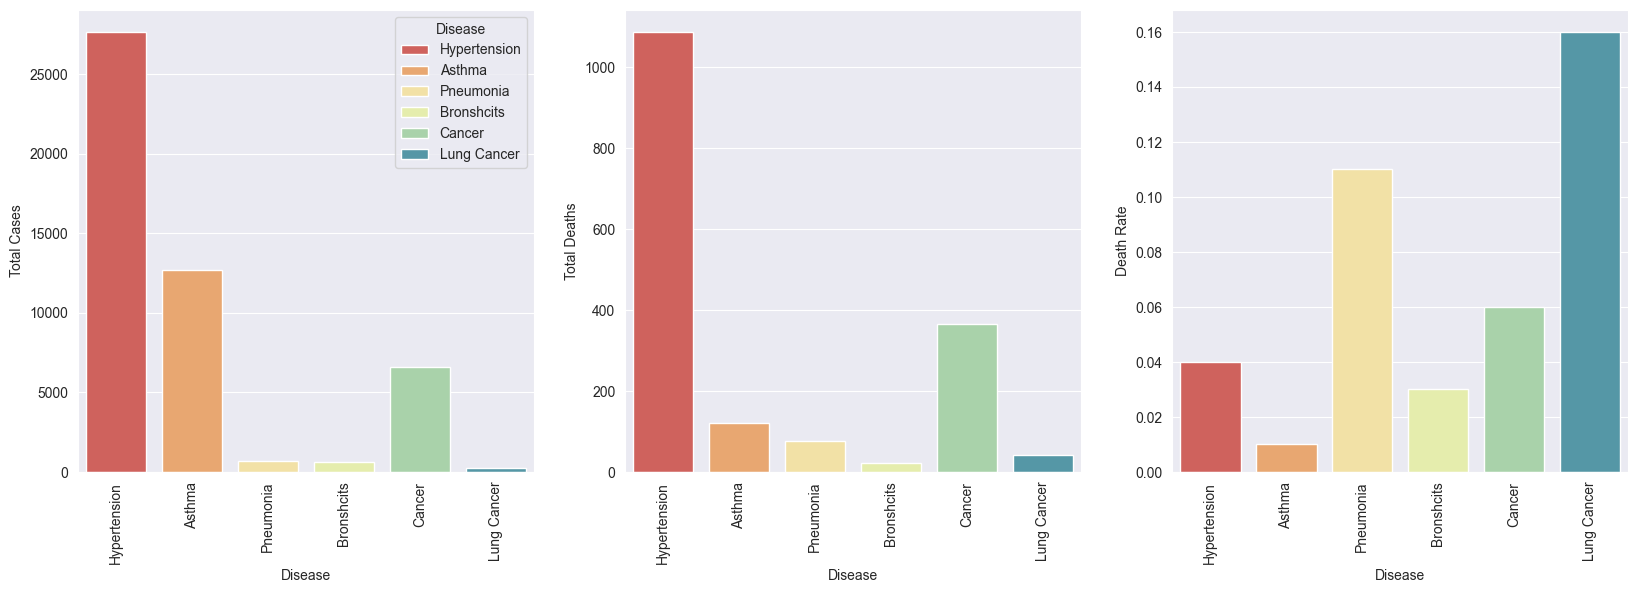

In [61]:
plt.subplots(1,3,figsize=(20,6));
plt.subplot(1,3,1)
sns.barplot(data=df_by_diseases.iloc[[0, 1, 2, 3, 4,6]],x="Disease",y="Total Cases",hue="Disease",palette="Spectral",legend=True);
plt.xticks(rotation=90);
plt.subplot(1,3,2)
sns.barplot(data=df_by_diseases.iloc[[0, 1, 2, 3, 4,6]],x="Disease",y="Total Deaths",hue="Disease",palette="Spectral");
plt.xticks(rotation=90);
plt.subplot(1,3,3)
sns.barplot(data=df_by_diseases.iloc[[0, 1, 2, 3, 4,6]],x="Disease",y="Death Rate",hue="Disease",palette="Spectral");
plt.xticks(rotation=90);

In [62]:
#Re-Covid rates by the specified disease
hp_recovd=float(hp_df[(hp_df["died"]=="N") & ~(hp_df["recovd"]=="U")]["recovd"].value_counts(normalize=True).round(2).get("Y",0))
asthma_recovd=float(asthma_df[(asthma_df["died"]=="N") & ~(asthma_df["recovd"]=="U")]["recovd"].value_counts(normalize=True).round(2).get("Y",0))
pneum_recovd=float(pneum_df[(pneum_df["died"]=="N") & ~(pneum_df["recovd"]=="U")]["recovd"].value_counts(normalize=True).round(2).get("Y",0))
bron_recovd=float(bron_df[(bron_df["died"]=="N") & ~(bron_df["recovd"]=="U")]["recovd"].value_counts(normalize=True).round(2).get("Y",0))
cancer_recovd=float(cancer_df[(cancer_df["died"]=="N") & ~(cancer_df["recovd"]=="U")]["recovd"].value_counts(normalize=True).round(2).get("Y",0))
hiv_recovd=float(hiv_df[(hiv_df["died"]=="N") & ~(hiv_df["recovd"]=="U")]["recovd"].value_counts(normalize=True).round(2).get("Y",0))
lung_recovd=float(lung_df[(lung_df["died"]=="N") & ~(lung_df["recovd"]=="U")]["recovd"].value_counts(normalize=True).round(2).get("Y",0))
recovd_rates=[hp_recovd,asthma_recovd,pneum_recovd,bron_recovd,cancer_recovd,hiv_recovd,lung_recovd]
df_by_diseases["Re-Covid Rate"]=recovd_rates
df_by_diseases

,Disease,Total Cases,Total Deaths,Death Rate,Re-Covid Rate
0,Hypertension,27666,1087,0.04,0.47
1,Asthma,12661,120,0.01,0.50
2,Pneumonia,671,75,0.11,0.61
3,Bronshcits,644,22,0.03,0.48
4,Cancer,6580,366,0.06,0.52
5,HIV,31,0,0.00,0.35
6,Lung Cancer,264,41,0.16,0.51


In [63]:
#Re-Coivd rating by the vaccine type.
df[(df["died"]=="N") & ~(df["recovd"]=="U") & ~df["vax_manu"].isin(["UNKNOWN MANUFACTURER", "NOVAVAX"])].groupby("vax_manu")["recovd"].value_counts(normalize=True).round(2)

vax_manu         recovd
JANSSEN          N         0.51
                 Y         0.49
MODERNA          Y         0.51
                 N         0.49
PFIZER\BIONTECH  Y         0.53
                 N         0.47
Name: proportion, dtype: float64

In [71]:
df["symptoms"].value_counts().head(10)

symptoms
Expired product administered                            9105
Product storage error                                   7485
Product administered to patient of inappropriate age    5238
COVID-19, SARS-CoV-2 test positive                      4540
Tinnitus                                                3431
Inappropriate schedule of product administration        3324
Incorrect dose administered                             3198
Rash                                                    2976
Dizziness                                               2636
Unevaluable event                                       2453
Name: count, dtype: int64

In [65]:
symptoms = df['symptoms'].str.split(', ').explode().tolist()

In [66]:
adverse_effects=pd.Series(symptoms).value_counts().reset_index().head(100)

In [70]:
adverse_effects.head(10)

,index,count
0,Headache,95320
1,Fatigue,83758
2,Pyrexia,83228
3,Pain,74089
4,Chills,68907
5,Dizziness,56530
6,Nausea,54952
7,Pain in extremity,50199
8,Dyspnoea,35365
9,Injection site pain,35224


In [ ]:
#Now We are going to get into statistical testing for some conditions.
